In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/utkarshjadhav96/ML-Lab/main/employee_data.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Employee_ID,Name,Age,Salary,Department,Experience (Years),City,Gender,Performance Score
0,101,Employee_1,50,110592,HR,9,Denver,Female,84
1,102,Employee_2,36,48110,IT,29,San Diego,Male,92
2,103,Employee_3,29,119309,IT,26,Chicago,Female,97
3,104,Employee_4,42,67266,Marketing,25,Seattle,Male,65
4,105,Employee_5,40,92992,Finance,24,Boston,Male,91


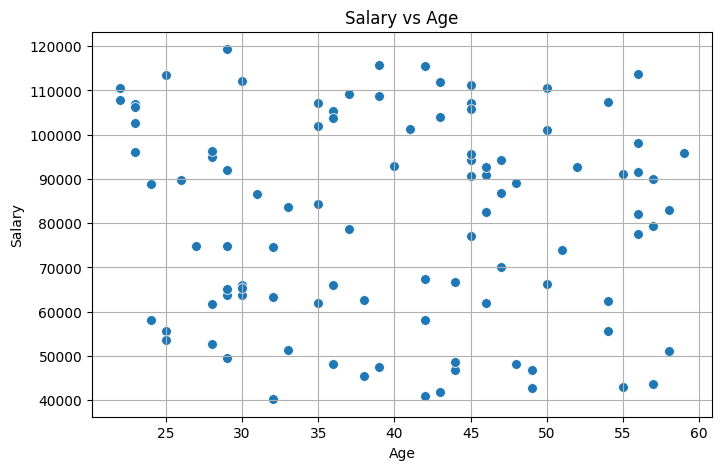

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Salary', s=50)
plt.title("Salary vs Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         100 non-null    int64 
 1   Name                100 non-null    object
 2   Age                 100 non-null    int64 
 3   Salary              100 non-null    int64 
 4   Department          100 non-null    object
 5   Experience (Years)  100 non-null    int64 
 6   City                100 non-null    object
 7   Gender              100 non-null    object
 8   Performance Score   100 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [7]:
df = df.drop(['Employee_ID', 'Name'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['Department', 'City', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [11]:
df = df.drop(['Performance Score'], axis=1)

In [12]:
df.head()

,Age,Salary,Department,Experience (Years),City,Gender
0,50,110592,1,9,2,0
1,36,48110,2,29,6,1
2,29,119309,2,26,1,0
3,42,67266,3,25,7,1
4,40,92992,0,24,0,1


In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [15]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

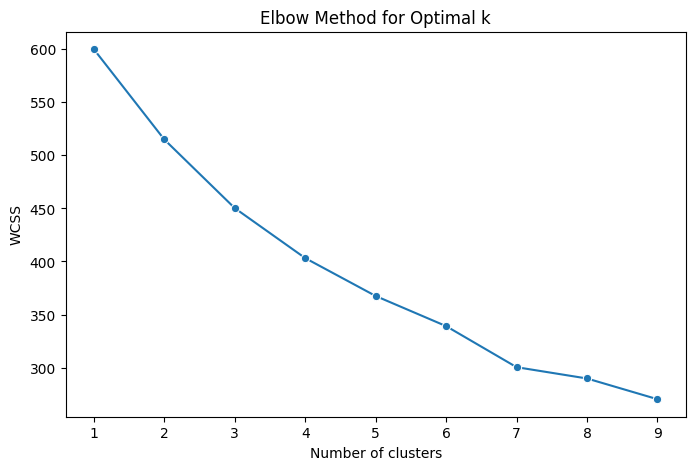

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, 10), y=wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [18]:
print(df['Cluster'].value_counts())

Cluster
2    40
1    35
0    25
Name: count, dtype: int64


In [20]:
from sklearn.decomposition import PCA


In [22]:
reduced = pca.fit_transform(scaled_data)
pca = PCA(n_components=2)


In [23]:

df['PCA1'] = reduced[:,0]
df['PCA2'] = reduced[:,1]


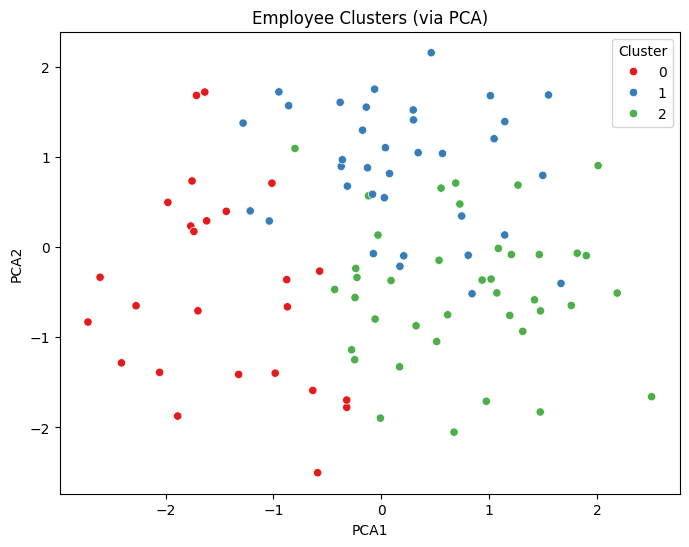

In [24]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("Employee Clusters (via PCA)")
plt.show()